https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"data\temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [3]:
# carga los datos de data/temps.csv

### 2. Lidia con las variables categóricas del dataset

In [4]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [5]:
# valores unicos de la columna week

df["week"].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [6]:
# valores de la columna week

df["week"].values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

ESTO ES UN CODIGO PARA CAMBIAR CATEGORIAS A VALORES DE FORMA AUTOMATICA. ESTO COGE TODOS ESOS VALORES UNICOS DE WEEK Y LES ASIGNA UN NUMERO A CADA UNO. OJO!! NO TIENE PORQUE SER LUNES 1, MARTES 2, MIERCOLES 3 AND SO ON

In [7]:
# usamos todos los datos (sin train ni test) pero esto habria que negociarlo...
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['week'])
le.transform(df['week'])

array([0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5,
       6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 5, 3, 5, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,

OTRA FORMA SERIA HACER COLUMNAS DUMMIES:

In [8]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,True,False
344,False,False,False,False,False,False,True
345,False,False,False,False,True,False,False
346,True,False,False,False,False,False,False


In [9]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,True,False
344,False,False,False,False,False,False,True
345,False,False,False,False,True,False,False
346,True,False,False,False,False,False,False


PERO AL FINAL, USAMOS LA FORMA "MANUAL" 

In [10]:
#Reemplaza el valor de la columna week con un diccionario
my_dict = {'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}

df['week'] = df['week'].replace(my_dict)

C:\Users\vipre\AppData\Local\Temp\ipykernel_58204\2500110800.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week'] = df['week'].replace(my_dict)


In [11]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


SI LOS DATOS SON MUY VARIABLES, A VECES INTERESA MODIFICAR UNA COLUMNA POR UN AGREGADO.
OS ACORDAIS DE LOS AGREGADOS? AQUI SE PIDE AGREGAR TEMPERATURA POR MES USANDO LA MEDIA:

In [12]:
# months_g = ...?
# months_g

months_g =  df.groupby(["month"])["temp_1"].mean()

months_g

month
1     49.677419
2     54.115385
3     56.483871
4     66.433333
5     68.838710
6     73.233333
7     76.225806
8     77.947368
9     70.428571
10    63.900000
11    56.966667
12    43.741935
Name: temp_1, dtype: float64

In [13]:
pd.DataFrame(months_g).reset_index()

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


In [14]:
pd.DataFrame(months_g)

,temp_1
month,
1,49.677419
2,54.115385
3,56.483871
4,66.433333
5,68.838710
6,73.233333
7,76.225806
8,77.947368
9,70.428571


ESTO LO DEJO. LO QUE HACEMOS ES UN JOIN PARA AGREGAR LA COLUMNA DE LA MEDIA MENSUAL AL DATO ORIGINAL
RECORDAD QUE NOS GENERARA UNA COLUMNA TEMP_1_X Y TEMP_1_Y POR QUE EL NOMBRE ESTA REPE

In [15]:
df = df.merge(months_g, on='month')

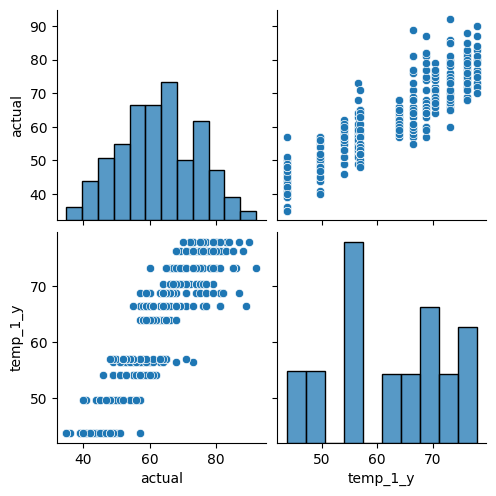

In [16]:
import seaborn as sns
sns.pairplot(df[['actual','temp_1_y']])

<Axes: >

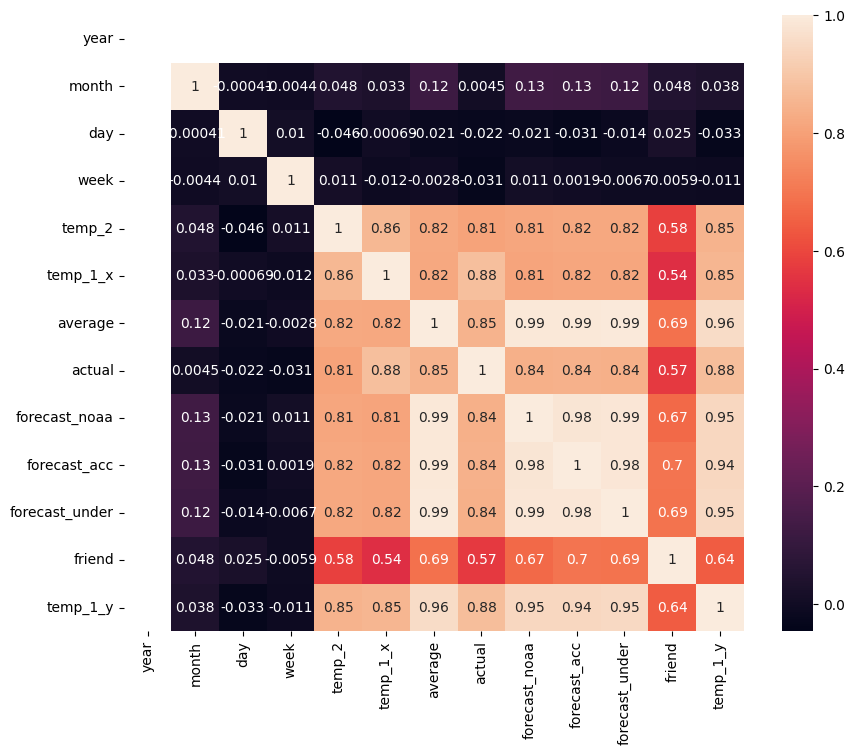

In [17]:
# HEATMAP

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

### 3. Divide en train y test

HACEMOS UN TRAIN TEST SPLIT DONDE QUITAMOS LAS COLUMNAS ['year','day','week'] Y USAMOS ACTUAL COMO TARGET

In [18]:
df = df.drop(columns=["year","day","week"])
df.head(5)

,month,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,1,45,45,45.6,45,43,50,44,29,49.677419
1,1,44,45,45.7,44,41,50,44,61,49.677419
2,1,45,44,45.8,41,43,46,47,56,49.677419
3,1,44,41,45.9,40,44,48,46,53,49.677419
4,1,41,40,46.0,44,46,46,46,41,49.677419


In [19]:
X = np.array(df.drop(columns=["actual"], axis = 1))
y = np.array(df["actual"])

In [20]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (278, 9)
y_train (278,)
X_test (70, 9)
y_test (70,)


### 4. Entrena el modelo


In [22]:
from sklearn.tree import DecisionTreeRegressor
# el modelo se llama dtr
# ...

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)


DecisionTreeRegressor()

In [69]:
dtr.feature_importances_

array([0.01756808, 0.02384009, 0.76616089, 0.10846856, 0.01498554,
       0.02287066, 0.02102636, 0.01636712, 0.0087127 ])

In [36]:
# muestra la feature importance del modelo

array([0.01864284, 0.02306268, 0.76979138, 0.09715291, 0.01512062,
       0.02218712, 0.03053199, 0.0179435 , 0.00556695])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [23]:
y_pred = dtr.predict(X_test)
y_pred

array([80., 68., 57., 68., 76., 76., 73., 79., 60., 69., 68., 67., 39.,
       59., 75., 55., 58., 54., 57., 67., 61., 55., 70., 60., 63., 48.,
       66., 45., 58., 82., 66., 68., 57., 87., 75., 60., 51., 48., 74.,
       40., 77., 54., 81., 41., 60., 76., 60., 87., 49., 39., 40., 39.,
       66., 64., 71., 57., 55., 61., 55., 53., 60., 46., 71., 71., 59.,
       59., 71., 67., 80., 39.])

In [58]:
y_pred = ...
y_pred

array([80., 68., 57., 64., 72., 76., 73., 79., 68., 81., 68., 67., 39.,
       59., 78., 57., 63., 54., 55., 79., 63., 57., 70., 59., 64., 48.,
       66., 45., 60., 77., 66., 64., 57., 88., 73., 60., 51., 51., 74.,
       40., 77., 54., 81., 41., 58., 76., 55., 79., 52., 39., 40., 39.,
       63., 64., 74., 61., 55., 61., 60., 57., 60., 46., 60., 71., 68.,
       57., 71., 67., 80., 39.])

In [34]:
# 
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.632704949616431
MAE 5.671428571428572
MAPE 0.08932215002456452
MSE 51.357142857142854
RMSE 7.166389806390862


In [28]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
# import numpy as np
# 
# print("Coeficiente determinación", r2_score(y_test, y_pred))
# print("MAE", mean_absolute_error(y_test, y_pred))
# print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
# print("MSE", mean_squared_error(y_test, y_pred))
# print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.632704949616431
MAE 5.671428571428572
MAPE 0.08932215002456452
MSE 51.357142857142854
RMSE 7.166389806390862


In [25]:
# print("Coeficiente determinación", r2_score(y_train, dtr.predict(X_train)))
# print("MAE", mean_absolute_error(y_train, dtr.predict(X_train)))
# print("MAPE", mean_absolute_percentage_error(y_train, dtr.predict(X_train)))
# print("MSE", mean_squared_error(y_train, dtr.predict(X_train)))
# print("RMSE", np.sqrt(mean_squared_error(y_train, dtr.predict(X_train))))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


In [35]:
#

print("Coeficiente determinación", r2_score(y_train, dtr.predict(X_train)))
print("MAE", mean_absolute_error(y_train, dtr.predict(X_train)))
print("MAPE", mean_absolute_percentage_error(y_train, dtr.predict(X_train)))
print("MSE", mean_squared_error(y_train, dtr.predict(X_train)))
print("RMSE", np.sqrt(mean_squared_error(y_train, dtr.predict(X_train))))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


### 6. Representa el árbol de decision

In [30]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

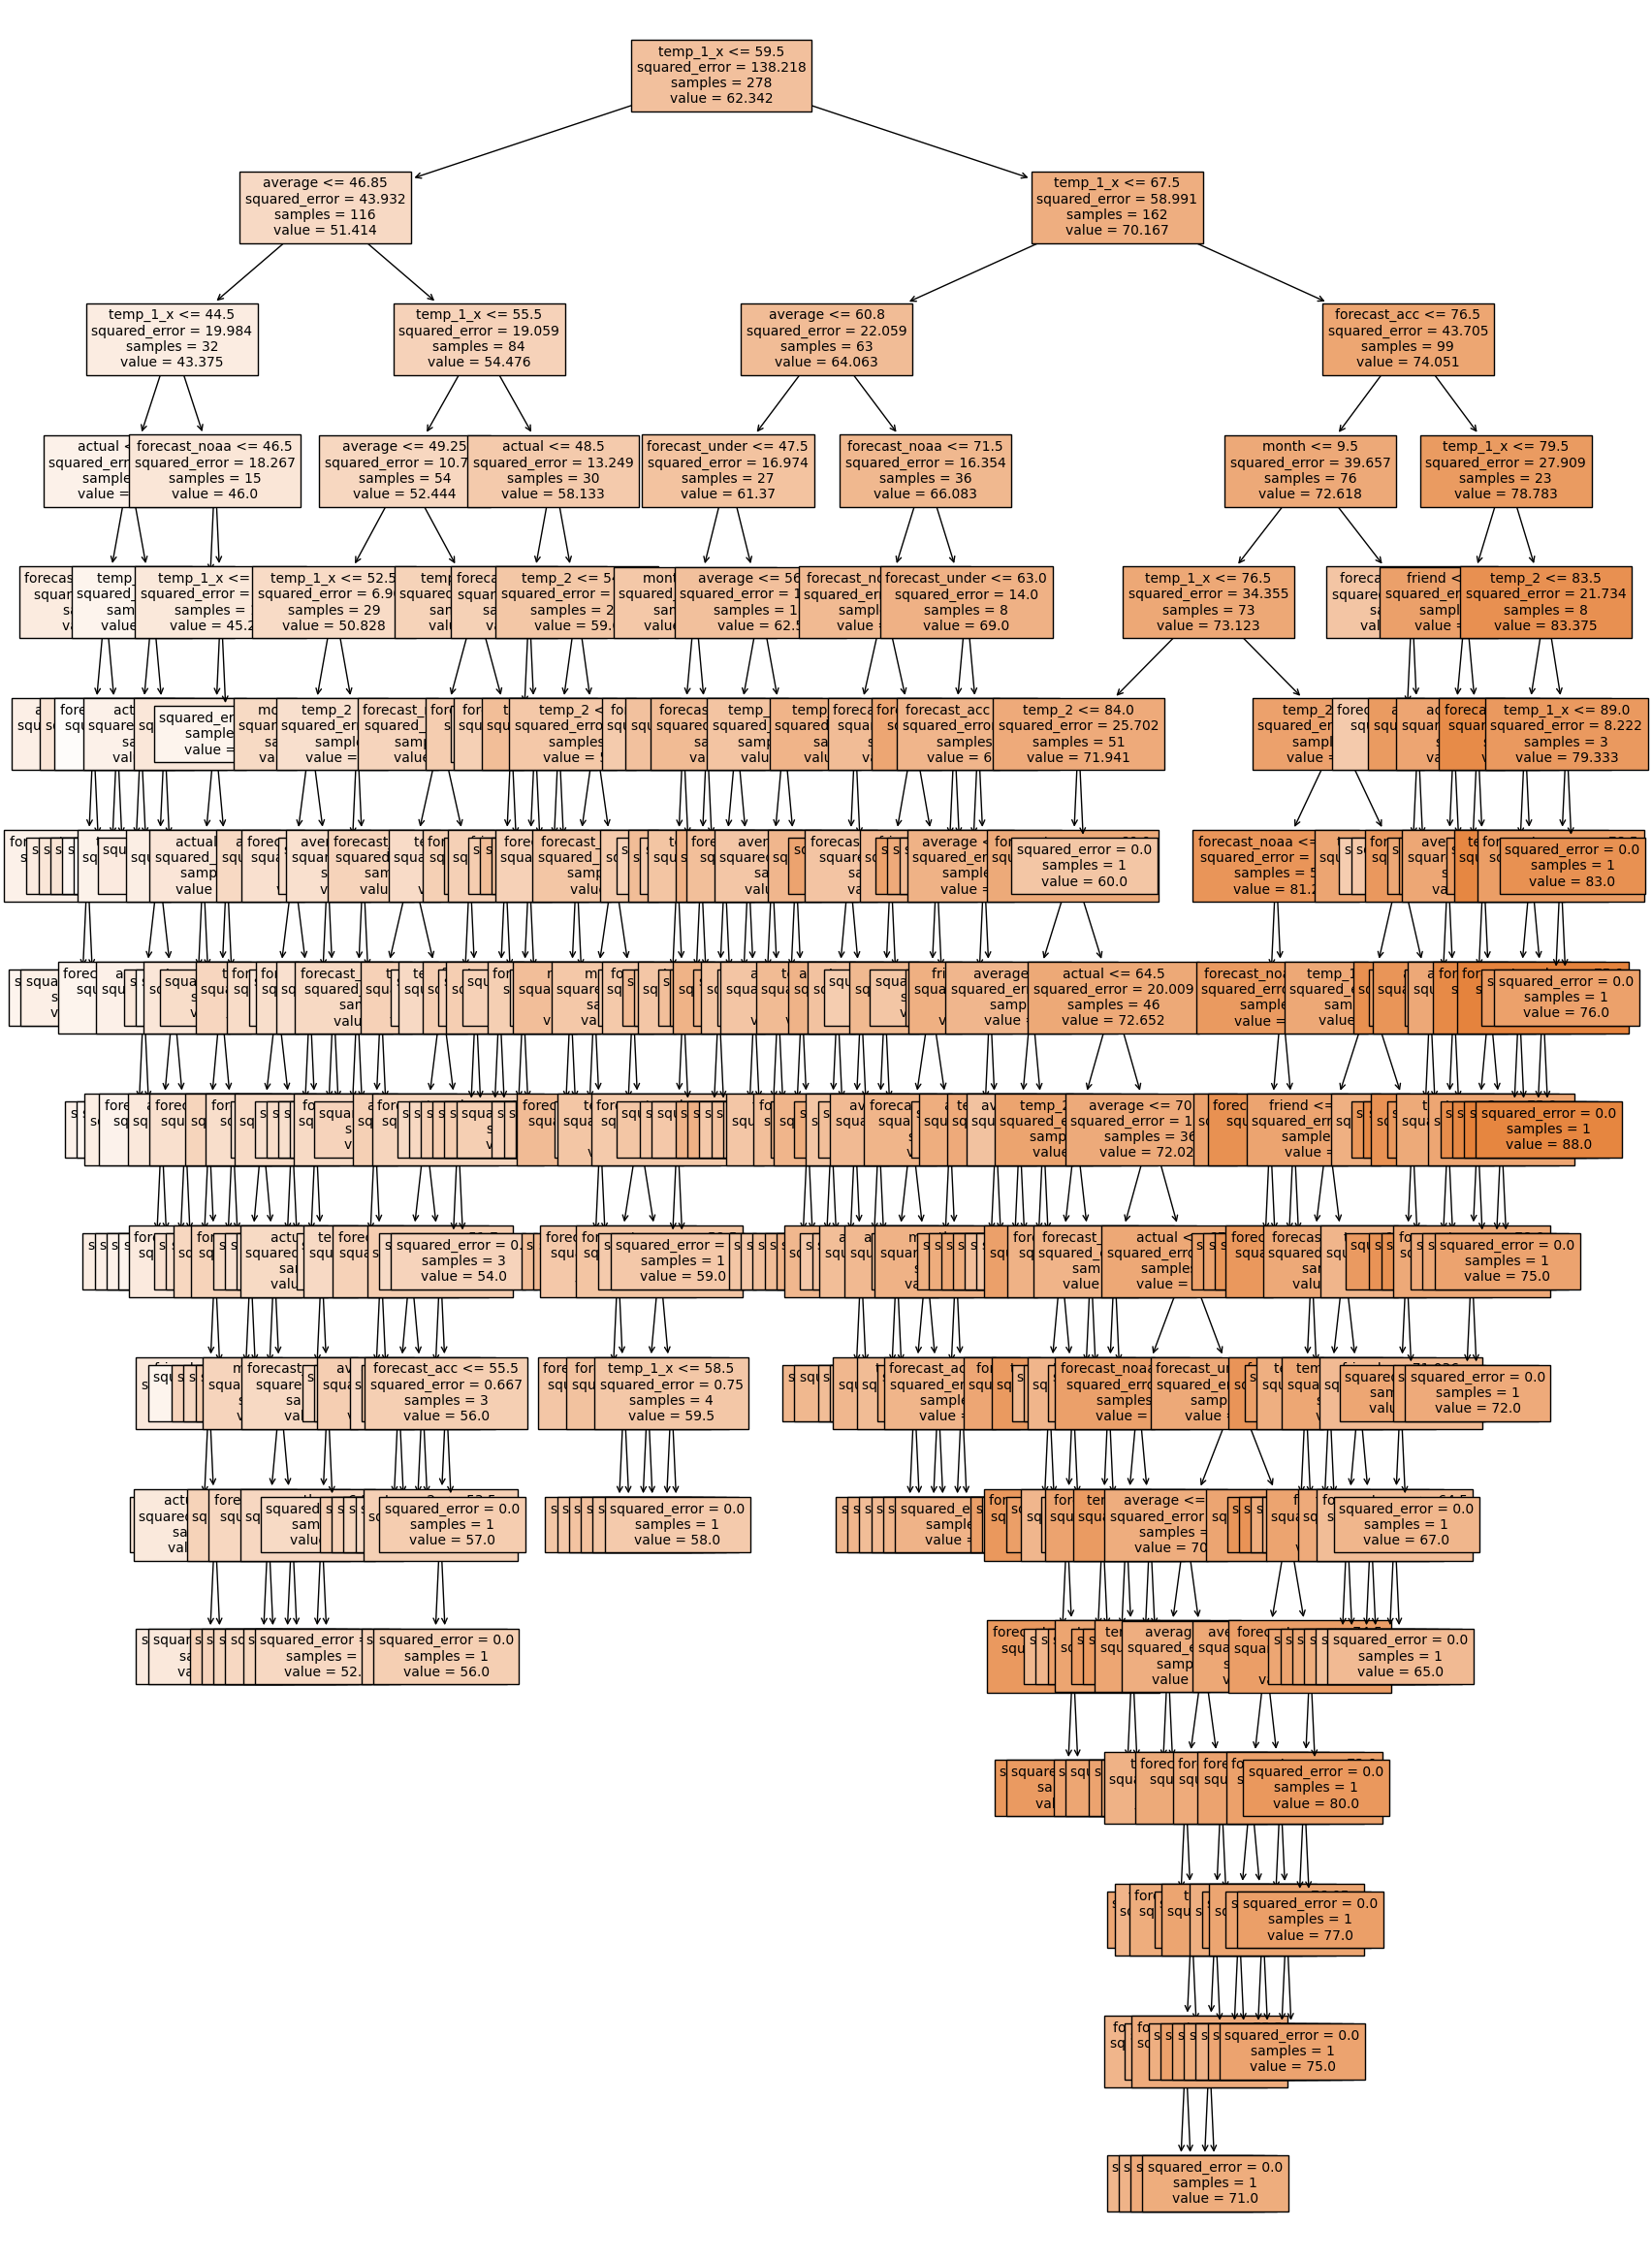

In [36]:
plt.figure(figsize=(20,30))

# SI LO HABEIS HECHO BIEN, ENTENDEREIS PORQUE USAMOS max_depth PARA CAMBIAR la profundidad de la visualización

tree.plot_tree(dtr,
               feature_names= df.columns,
               class_names=df["actual"], # probar con "actual",
               fontsize=10,
               filled = True);

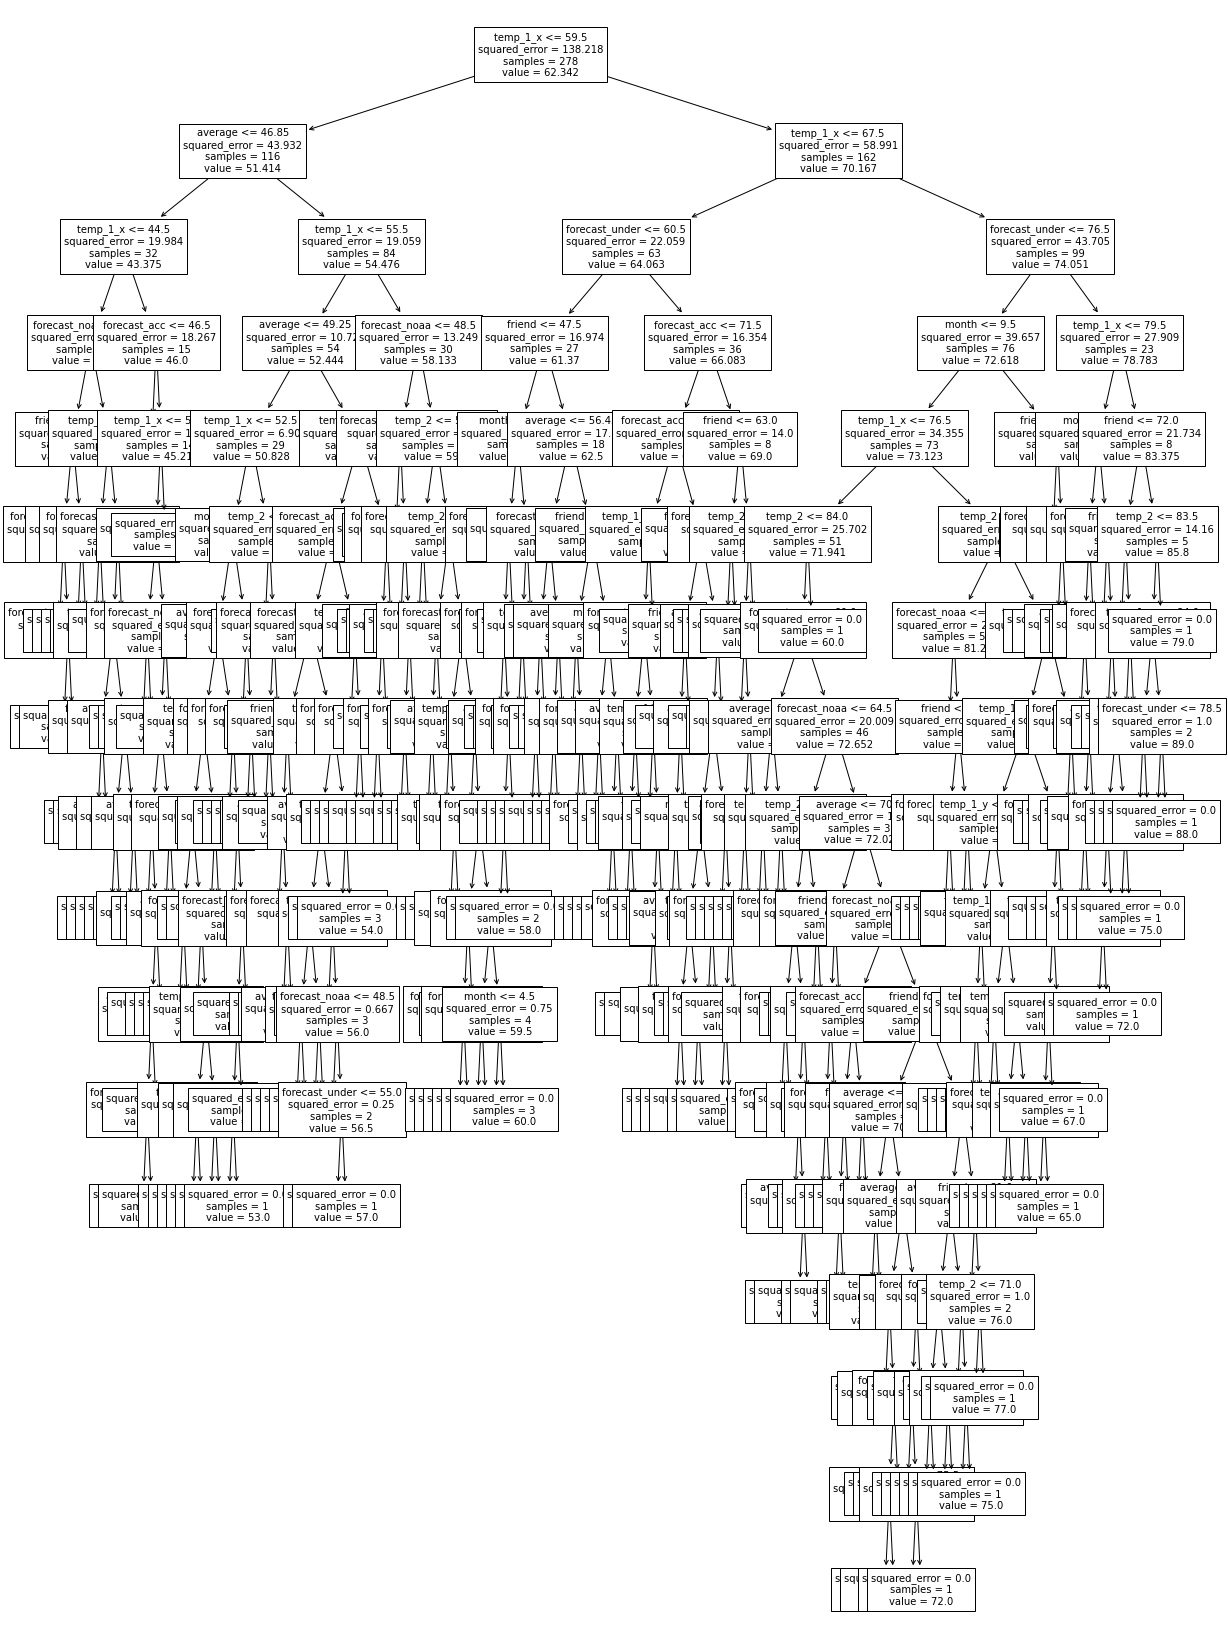

In [47]:
plt.figure(figsize=(20,30))

# SI LO HABEIS HECHO BIEN, ENTENDEREIS PORQUE USAMOS max_depth PARA CAMBIAR la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [37]:
dtr3 = DecisionTreeRegressor(max_depth=3,
                                  random_state=42)
dtr3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [38]:
y_pred = dtr3.predict(X_test)
y_pred

array([72.61842105, 61.37037037, 52.44444444, 66.08333333, 66.08333333,
       72.61842105, 72.61842105, 72.61842105, 61.37037037, 72.61842105,
       61.37037037, 72.61842105, 41.05882353, 61.37037037, 72.61842105,
       58.13333333, 61.37037037, 52.44444444, 58.13333333, 72.61842105,
       66.08333333, 58.13333333, 66.08333333, 61.37037037, 58.13333333,
       52.44444444, 66.08333333, 46.        , 58.13333333, 78.7826087 ,
       72.61842105, 66.08333333, 58.13333333, 78.7826087 , 78.7826087 ,
       61.37037037, 52.44444444, 52.44444444, 72.61842105, 46.        ,
       72.61842105, 52.44444444, 72.61842105, 41.05882353, 61.37037037,
       72.61842105, 52.44444444, 78.7826087 , 52.44444444, 41.05882353,
       46.        , 41.05882353, 66.08333333, 66.08333333, 72.61842105,
       61.37037037, 58.13333333, 58.13333333, 52.44444444, 58.13333333,
       66.08333333, 52.44444444, 61.37037037, 72.61842105, 61.37037037,
       58.13333333, 72.61842105, 72.61842105, 78.7826087 , 41.05

In [60]:
# dtr3 = ...

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [41]:
# y_pred = ....

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 9. Vuelve a representar su árbol

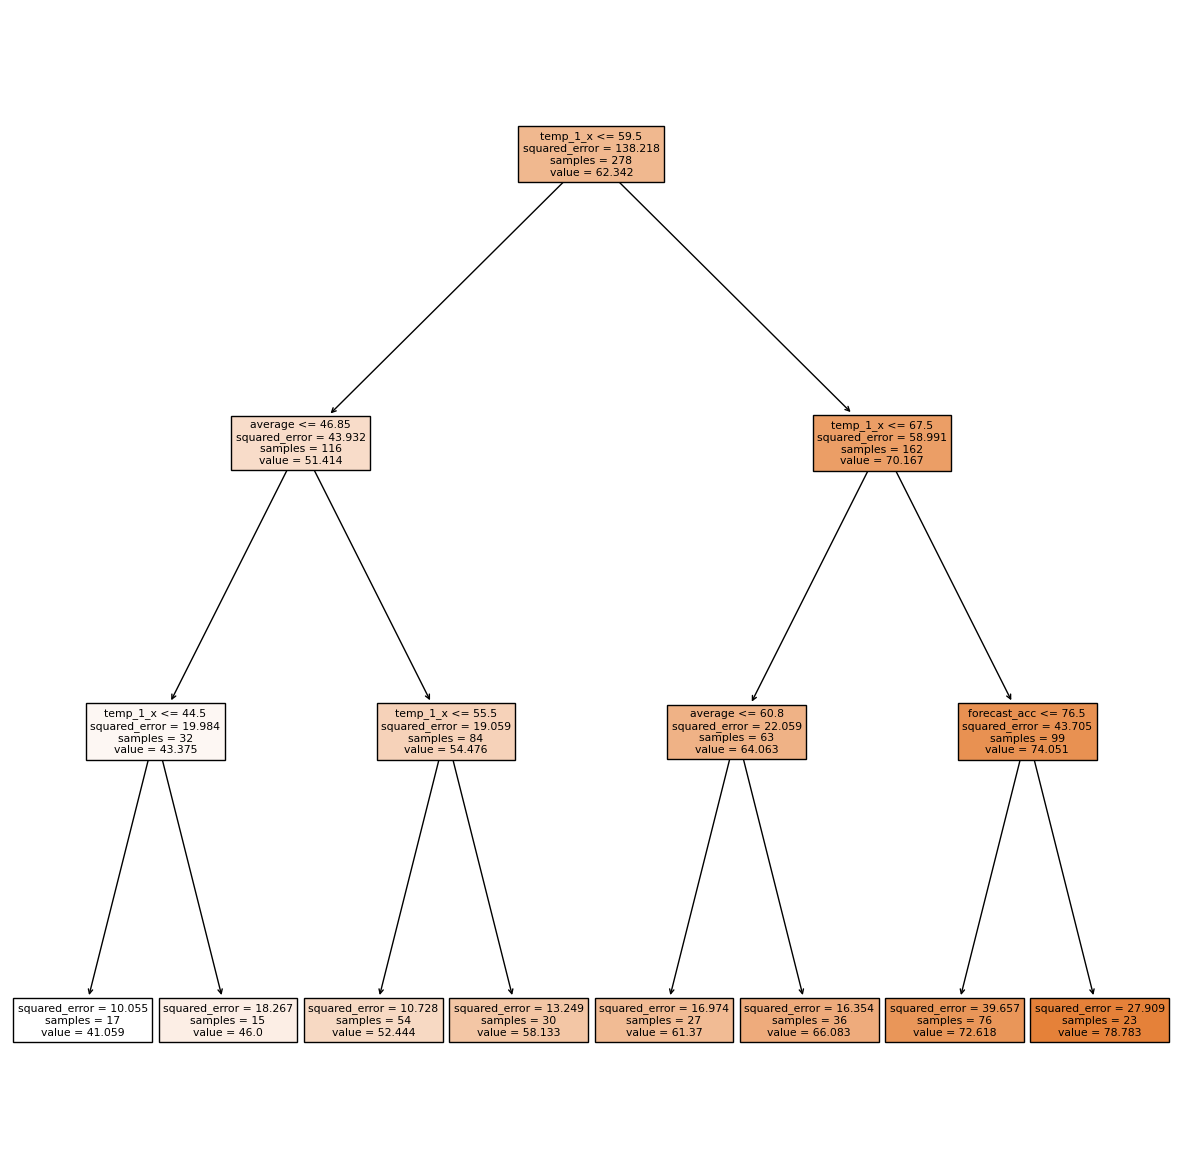

In [94]:
plt.figure(figsize=(15,15))

# mejor no?

tree.plot_tree(dtr3,
               feature_names= df.columns,
               class_names=True,
               filled = True);

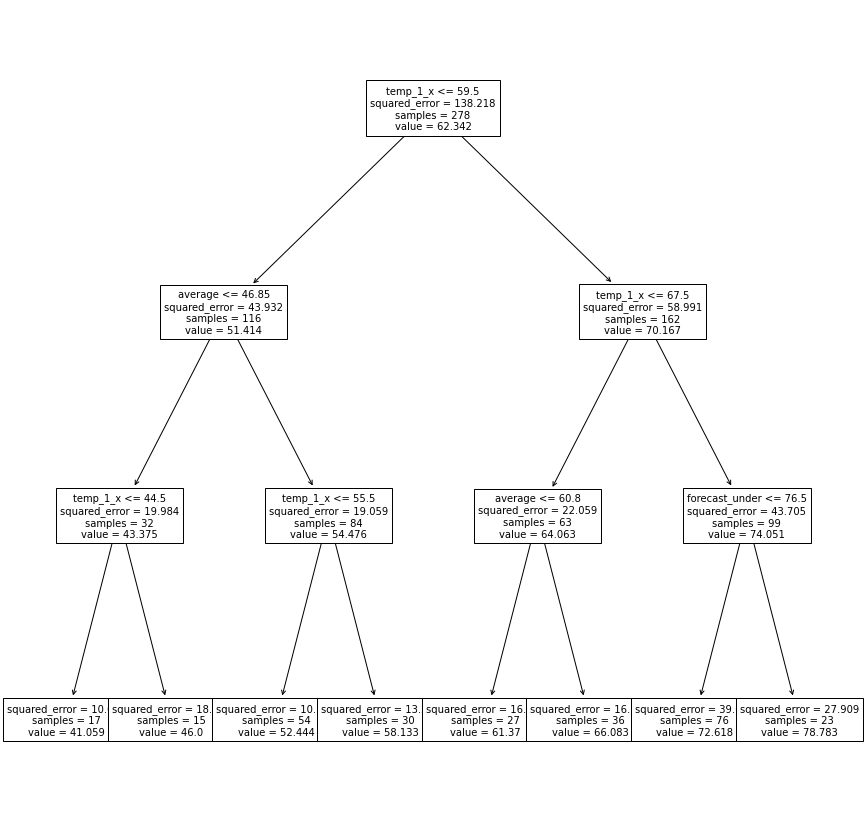

In [64]:
plt.figure(figsize=(15,15))

# mejor no?

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [96]:
# importancias

dtr3.feature_importances_

array([0.        , 0.        , 0.88020751, 0.09902152, 0.        ,
       0.        , 0.02077097, 0.        , 0.        ])

In [42]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [66]:
# columnas de X_train

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [101]:
pd.DataFrame({'features': ???, 'importances': ???}).sort_values('importances', ascending=False)

SyntaxError: invalid syntax (2383055865.py, line 1)

FIJAOS QUE SOLO USA 3 COLUMNAS...

In [43]:
# repetimos train test split pero solo nos quedamos las columnas que sirven para algo ['temp_1_x','average','forecast_under']

X = df.drop(columns=['temp_1_x','average','forecast_under'], axis = 1)
y = np.array(df["actual"])

In [45]:
X

,month,temp_2,actual,forecast_noaa,forecast_acc,friend,temp_1_y
0,1,45,45,43,50,29,49.677419
1,1,44,44,41,50,61,49.677419
2,1,45,41,43,46,56,49.677419
3,1,44,40,44,48,53,49.677419
4,1,41,44,46,46,41,49.677419
...,...,...,...,...,...,...,...
343,12,42,47,41,50,47,43.741935
344,12,42,48,41,49,58,43.741935
345,12,47,48,43,50,65,43.741935
346,12,48,57,44,46,42,43.741935


In [46]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X.shape

(348, 7)

In [48]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (278, 7)
y_train (278,)
X_test (70, 7)
y_test (70,)


In [49]:
# dtr_3 = ...

dtr3 = DecisionTreeRegressor(max_depth=3,
                                  random_state=42)
dtr3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [50]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

VAMOS A TRANSFORMAR UN PROBLEMA DE REGRESION EN CLASIFICACION. GENERAREMOS UNA CLASE DONDE PONDREMOS 1 SI LA TEMPERATURA PASA DE 59 (GRADOS FAHRENHEIT), Y SI NO 0.

In [51]:
df['target_clas'] = np.where(df['actual']>59,1,0)
df[['actual','target_clas']].head()

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


<Axes: >

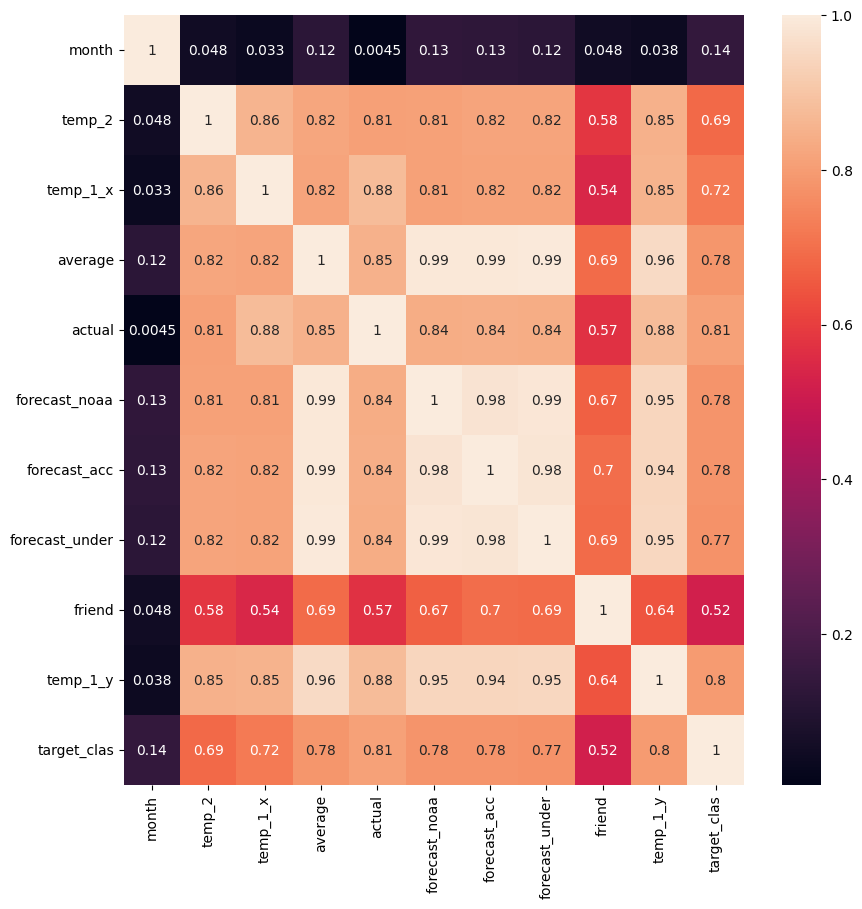

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [53]:
df['target_clas'].value_counts()

target_clas
1    204
0    144
Name: count, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [ ]:
# ENRTRENA UN MODELO DE CLASIFICACION LLAMADO dtc

DecisionTreeClassifier(max_depth=3)

In [94]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [93]:
# dtc feature importance

array([0.        , 0.        , 0.08751759, 0.83792502, 0.05793051,
       0.        , 0.01076818, 0.0058587 , 0.        ])

In [89]:
# accuracy de dtc en test

0.9

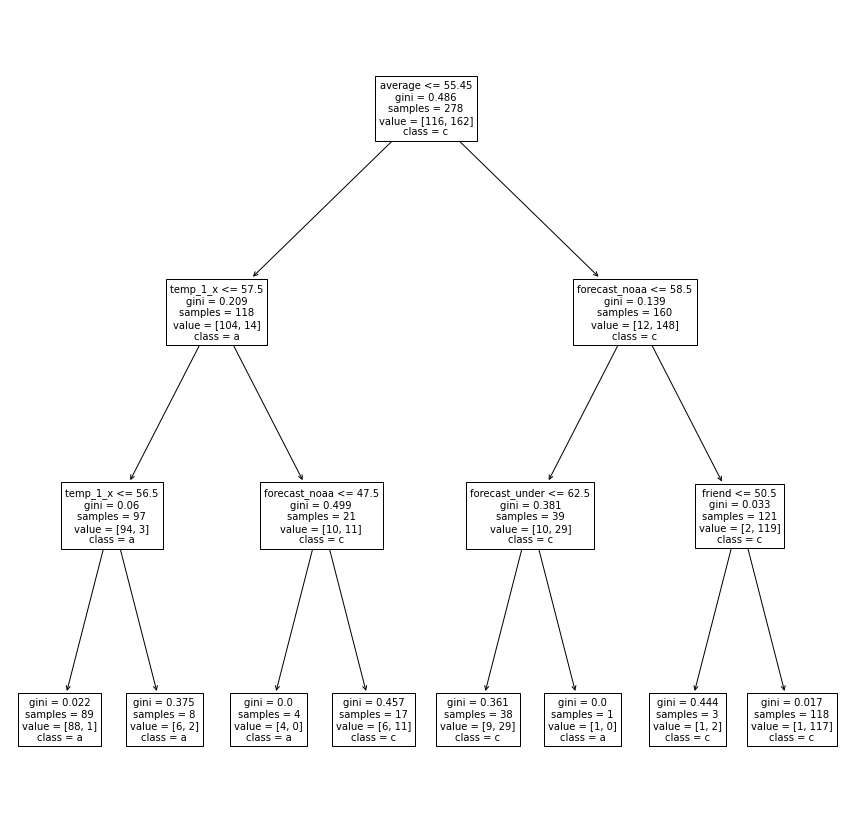

In [90]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

COMPARA LA ACCURACY CON UN LOGISTIC REGRESSOR A PELO

In [95]:
from sklearn.linear_model import LogisticRegression

# lr
# lr.fit
# accuracy_acore(..., ...)

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8428571428571429

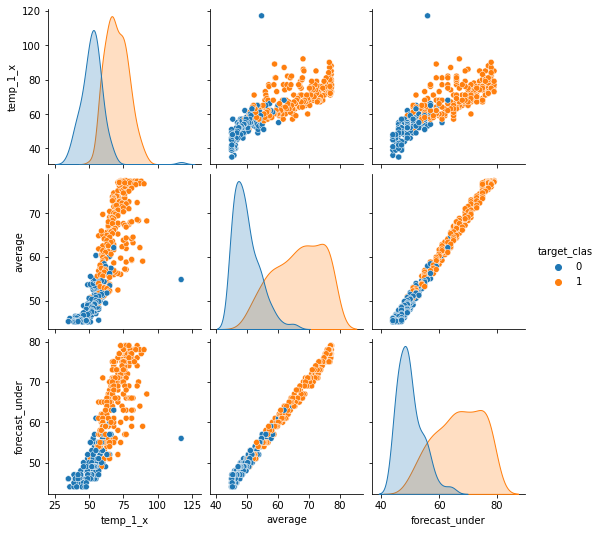

In [97]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')

### 12. BONUS TRACK: Repite el experimEnto con un un nuevo modelo `RandomForestClassifier` . A lo facil

In [98]:
from sklearn.ensemble import RandomForestClassifier

rfc = ...

RandomForestClassifier(max_depth=3)

In [99]:
accuracy_score(y_test,rfc.predict(X_test))

0.9428571428571428